# Outlier Detection
In this exercise, we have a dataset which should fit to the line y = 6.25*x + constt using Linear Regression. The dataset has some outliers. The aim of the exercise is to detect these outliers, remove a fixed subset of them, and retrain the Linear Regression model to hopeflly get a better fit.

I am calculating the residuals for each data point, and removing points with the highest residuals. In doing so, I remove 10% of the data points, and this improves the prediction on the test data set (R^2 jumps from 0.878 to 0.98)

In [ ]:
%matplotlib inline
import random
import numpy
import matplotlib.pyplot as plt
import pickle

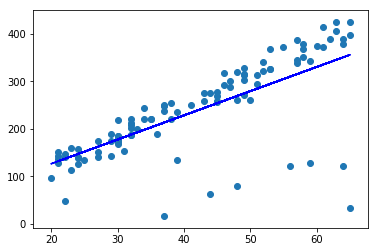

In [15]:
## load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train,net_worths_train)


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()




In [13]:
# Properties of the line
print "Slope = ", reg.coef_
print "Intercept = ", reg.intercept_
print "R^2 training data =", reg.score(ages_train, net_worths_train )
print "R^2 test data =", reg.score(ages_test, net_worths_test )

Slope =  [[ 5.07793064]]
Intercept =  [ 25.21002155]
R^2 training data = 0.489872596175
R^2 test data = 0.878262470366


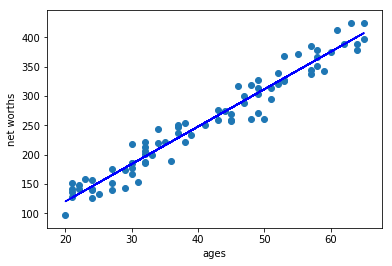

In [18]:
### identify and remove the most outlier-y points
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    errors = (net_worths-predictions)**2
    cleaned_data =zip(ages,net_worths,errors)
    cleaned_data = sorted(cleaned_data,key=lambda x:x[2][0], reverse=True)
    limit = int(len(net_worths)*0.1)
    
    
    return cleaned_data[limit:]

    
    return cleaned_data

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train,net_worths_train)
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"
    
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"


In [19]:
# Properties of the line
print "Slope = ", reg.coef_
print "Intercept = ", reg.intercept_
print "R^2 training data =", reg.score(ages_train, net_worths_train )
print "R^2 test data =", reg.score(ages_test, net_worths_test )

Slope =  [[ 6.36859481]]
Intercept =  [-6.91861069]
R^2 training data = 0.409325454478
R^2 test data = 0.983189455396
